In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('data.csv')

In [83]:
#encoding signal
signal = list(data.signal.unique())
for i in range(len(signal)):
    data.signal.replace({signal[i]:i},inplace=True)

<Axes: >

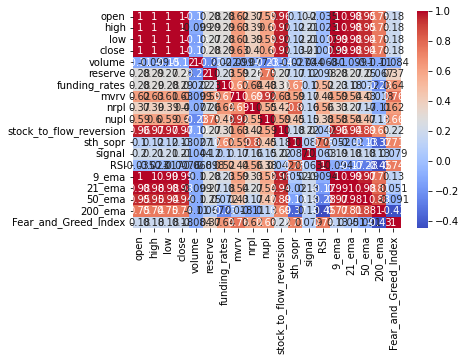

In [84]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [85]:
data = data.drop(['datetime'], axis = 1)

In [86]:
# Check for negative values in each column
columns_with_negatives = data.columns[(data < 0).any()]

# Print columns with negative values
print("Columns with negative values:")
print(columns_with_negatives)

Columns with negative values:
Index(['funding_rates', 'nrpl', 'nupl'], dtype='object')


In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

# Fit and transform selected columns
data[columns_with_negatives] = scaler.fit_transform(data[columns_with_negatives])

# Check the scaled columns
print(data[columns_with_negatives])

     funding_rates      nrpl      nupl
0         0.465514  0.422856  0.635702
1         0.457869  0.423253  0.637455
2         0.446281  0.423971  0.638958
3         0.459889  0.425239  0.641546
4         0.468883  0.423918  0.637428
..             ...       ...       ...
930       0.468153  0.459271  0.452341
931       0.495878  0.439719  0.443978
932       0.477149  0.433091  0.441783
933       0.457788  0.437090  0.437959
934       0.445436  0.423542  0.424615

[935 rows x 3 columns]


In [88]:
#Rechecking for negative value
columns_with_negatives = data.columns[(data < 0).any()]
print("Columns with negative values:")
print(columns_with_negatives)

Columns with negative values:
Index([], dtype='object')


In [89]:
#adding signal to the end for the dataframe
target = data[['signal']]
data = data.drop(['signal'], axis = 1)
data['signal']=target

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

multiclass_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multilayer Perceptron': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False, iterations=100, depth=10, learning_rate=0.05, loss_function='MultiClass'),
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true,y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro')
}

In [92]:
input_data = data.iloc[: , :19]
X_train, X_test, y_train, y_test = train_test_split(input_data, data['signal'], test_size=.2, random_state=42)
print(input_data)

         open      high       low     close        volume       reserve  \
0     9190.80   9216.02   9005.00   9130.11   8765.698589  2.889262e+06   
1     9130.93   9182.99   9054.99   9154.29   6423.747162  2.889943e+06   
2     9154.29   9210.00   9122.65   9175.85   4121.626974  2.890642e+06   
3     9175.83   9245.03   9105.37   9212.87   3520.072476  2.892067e+06   
4     9214.01   9223.51   9131.00   9161.05   5815.330842  2.891858e+06   
..        ...       ...       ...       ...           ...           ...   
930  23127.15  23813.57  22760.00  23735.97  20292.224170  2.228658e+06   
931  23735.97  24262.18  23367.87  23493.84  16368.921383  2.225632e+06   
932  23497.29  23720.00  23208.01  23433.54  14215.668430  2.221115e+06   
933  23433.47  23589.67  23257.71  23328.87   3567.130075  2.219863e+06   
934  23329.47  23433.20  22758.01  22936.34   6536.140584  2.222216e+06   

     funding_rates      mvrv      nrpl      nupl  stock_to_flow_reversion  \
0         0.465514  1.

In [93]:
fitted_models = {}
model_names = ['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','AdaBoost','Bagging','SVM','K-Nearest Neighbors','Naive Bayes','Multilayer Perceptron','XGBoost','LightGBM','CatBoost']
scored_metrics = {model_name: {'Accuracy': None, 'Precision': None, 'Recall': None} for model_name in model_names}

for model_name, model in multiclass_models.items():
    fitted_models[model_name] = model.fit(X_train, y_train)
    for metric_name, metric in metrics.items():
        scored_metrics[model_name][metric_name] = metric(y_test, model.predict(X_test))

c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\khushi\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4327
[LightGBM] [Info] Number of data points in the train set: 748, number of used features: 19
[LightGBM] [Info] Start training from score -0.182856
[LightGBM] [Info] Start training from score -2.556960
[LightGBM] [Info] Start training from score -2.412710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [94]:
#model comparison
comp = pd.DataFrame(scored_metrics).style.background_gradient(cmap='Greens')
comp

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Bagging,SVM,K-Nearest Neighbors,Naive Bayes,Multilayer Perceptron,XGBoost,LightGBM,CatBoost
Accuracy,0.791444,1.000000,0.994652,1.000000,1.000000,1.000000,0.791444,0.802139,0.256684,0.770053,1.000000,1.000000,1.000000
Precision,0.263815,1.000000,0.983333,1.000000,1.000000,1.000000,0.263815,0.600000,0.418053,0.347765,1.000000,1.000000,1.000000
Recall,0.333333,1.000000,0.983333,1.000000,1.000000,1.000000,0.333333,0.368421,0.541038,0.353153,1.000000,1.000000,1.000000
